## Explorando Animelists

### Importar datos y cargar librerías


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Libraries

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Se carga el dataset desde Google Drive en formato *.csv*, para luego leer este con *pandas*.


In [3]:
path_data = '/content/drive/MyDrive/DataMining/animelists_cleaned.csv'

In [4]:
# Read data

data = pd.read_csv(path_data)

## Exploración numérica de los datos

In [5]:
print('Dataset:',str(data.shape[0]),'rows,',str(data.shape[1]),'columns')

Dataset: 31284030 rows, 11 columns


In [6]:
print('Dataset columns')
print()
for col in data.columns:
    print(col)

Dataset columns

username
anime_id
my_watched_episodes
my_start_date
my_finish_date
my_score
my_status
my_rewatching
my_rewatching_ep
my_last_updated
my_tags


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      object 
 10  my_tags              object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [8]:
data.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128403e+07,3.128403e+07,3.128403e+07,3.128403e+07,2.440578e+07,3.128403e+07
mean,1.170326e+04,1.289615e+01,4.652315e+00,3.008111e+00,7.903045e-04,1.832994e-01
std,1.134844e+04,3.733380e+01,3.931615e+00,1.730421e+00,2.810124e-02,1.009172e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


In [9]:
stats.iqr(data['my_watched_episodes'])

13.0

In [10]:
data.isna().sum()

username                    243
anime_id                      0
my_watched_episodes           0
my_start_date                 0
my_finish_date                0
my_score                      0
my_status                     0
my_rewatching           6878247
my_rewatching_ep              0
my_last_updated               0
my_tags                29290313
dtype: int64

Si se eliminaran todos los valores NaN del dataset, este quedaría con muy pocos datos. Frente a esto es mejor eliminar las columnas de ***my_tags*** y ***my_rewatching***. Además, las columnas de ***username*** y ***anime_id*** no parecen, a priori, aportar mucha información, por lo que se eliminarán igualmente.

In [11]:
col_to_del = [
              'username',
              'anime_id',
              'my_rewatching',
              'my_tags'
]

for col in col_to_del:
    try:
        del data[col]
    except:
        continue

data

,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching_ep,my_last_updated
0,586,0000-00-00,0000-00-00,9,1,0,2013-03-03 10:52:53
1,26,0000-00-00,0000-00-00,7,2,0,2013-03-10 13:54:51
2,26,0000-00-00,0000-00-00,7,2,0,2013-04-27 16:43:35
3,26,0000-00-00,0000-00-00,7,2,0,2013-03-03 10:53:57
4,26,0000-00-00,0000-00-00,7,2,0,2013-03-27 15:59:13
...,...,...,...,...,...,...,...
31284025,48,2014-00-00,0000-00-00,9,1,0,2015-09-07 17:33:03
31284026,22,0000-00-00,0000-00-00,9,1,0,2015-09-07 17:32:05
31284027,39,0000-00-00,0000-00-00,8,2,0,2010-03-29 04:24:12
31284028,52,0000-00-00,0000-00-00,9,2,0,2009-12-23 05:45:14


## Exploración visual de los datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88497c1d0>,
      dtype=object)

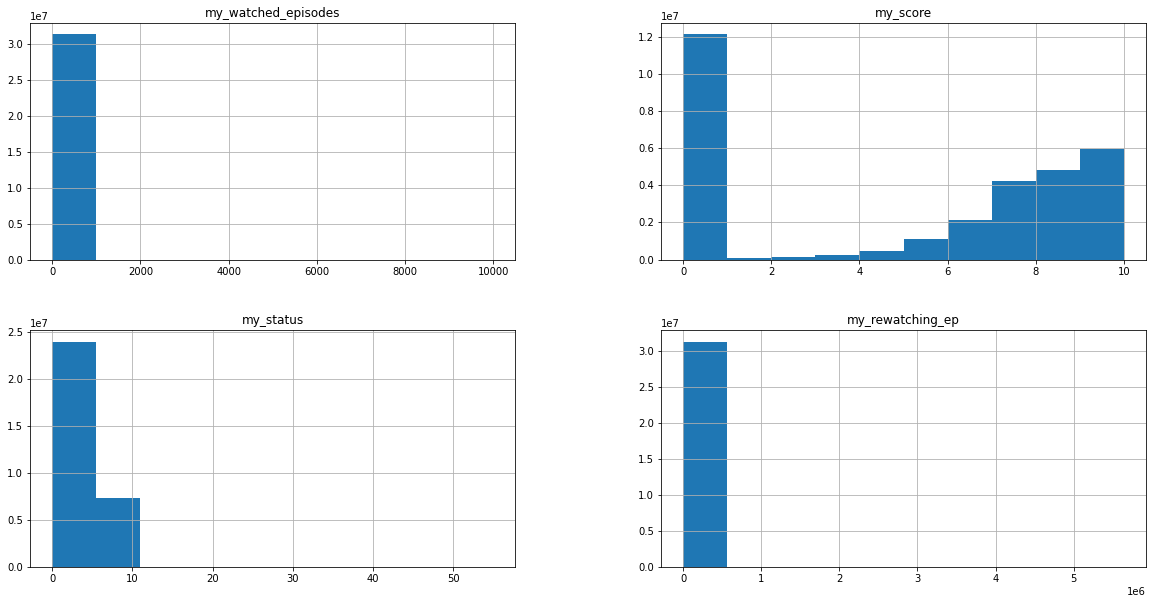

In [12]:
data.hist(figsize=(20,10))

Text(0.5, 0, 'My watched episodes')

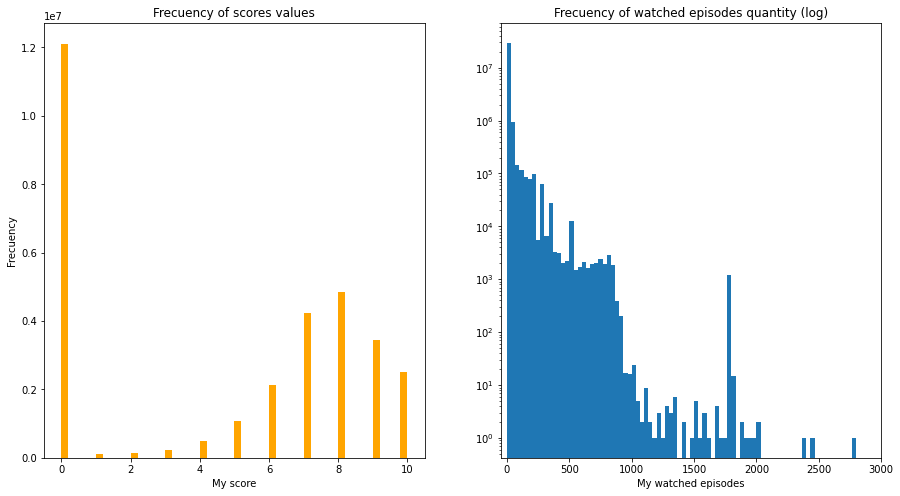

In [13]:
# More attention in my_score

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.hist(data['my_score'],bins=50,color='orange')
ax1.set_title('Frecuency of scores values')
ax1.set_xlabel('My score')
ax1.set_ylabel('Frecuency')

ax2.hist(data['my_watched_episodes'], bins=300,log=True)
ax2.set_xlim(-50,3000)
ax2.set_title('Frecuency of watched episodes quantity (log)')
ax2.set_xlabel('My watched episodes')

In [ ]:
# Estas lineas de codigo cuantos valores 0 hay en las columnas pedidas
# pero se demora mucho en correr (o derechamente no corre)

# Tengo que buscar una forma más eficiente de hacerlo

#score_zeros = data[data['my_score']==0].sum()
#wat_epi_zeros = data[data['my_watched_episodes']==0].sum()

Aquí pareciese haber una relación entre:


1.   La gran cantidad de ceros que hay en ***my_score*** y ***my_watched_videos***.
2.   Las curvas posteriores a la gran cantidad de 0's en ambos atributos.



In [ ]:
# Outliers my_watched_episodes

fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(x=data['my_watched_episodes'])
ax = plt.xlabel('My Watched Episodes')

# Outliers my_score
fig = plt.figure(figsize=(20,5),)
ax = sns.boxplot(x=data['my_score'])
ax = plt.xlabel('My Score')

# Outliers my_status

fig = plt.figure(figsize=(20,5),)
ax = sns.boxplot(x=data['my_status'])
ax = plt.xlabel('My Status')

In [ ]:
# Correlations

data.corr()